<a href="https://colab.research.google.com/github/shhuangmust/AI/blob/110-2/5.keras_CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 727,114 (2.77 MB)

 Trainable params: 727,114 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cifar10=keras.datasets.cifar10
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
train_label_original=train_label
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


<ipython-input-4-84413b7363d5>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(category[int(train_label_original[0])])


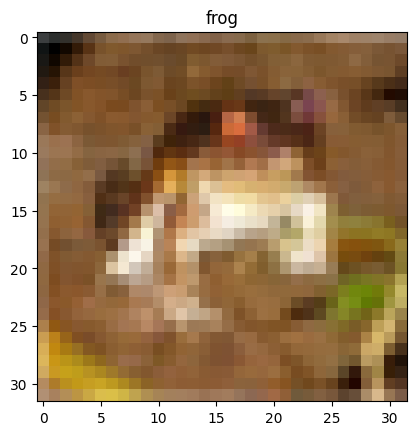

[6]


In [ ]:
import matplotlib.pyplot as plt
category=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.imshow(train_data[0])
plt.title(category[int(train_label_original[0])])
plt.show()
print(train_label_original[0])

In [ ]:
train_history=model.fit(train_data,train_label,epochs=30,batch_size=512)


Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.1520 - loss: 25.7332
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.1901 - loss: 2.3584
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.2645 - loss: 2.1719
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3438 - loss: 1.8643
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3981 - loss: 1.7373
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.4786 - loss: 1.5035
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.5194 - loss: 1.4166
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.5719 - loss: 1.2510
Epoch 9/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.6281 - loss: 1.0864
Epoch 10/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.6494 - loss: 1.0321
Epoch 11/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.6762 - loss: 0.9530
Epoch 12/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - 

In [ ]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5933 - loss: 3.4345
0.5907999873161316


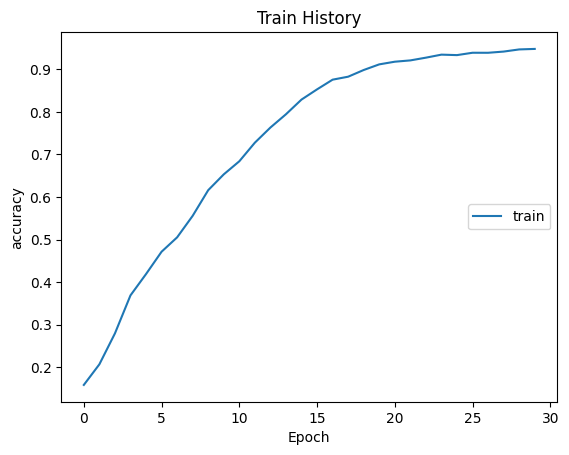

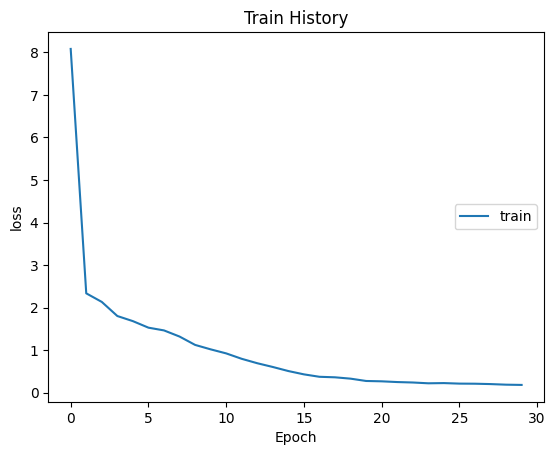

In [ ]:
#繪製正確性與損失歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy')
show_train_history(train_history, 'loss')